# Driver AI Fault Detector

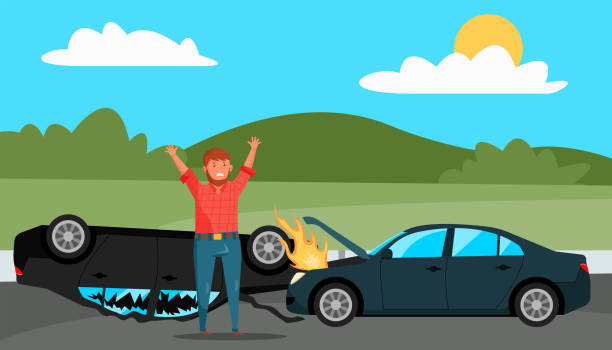

# Problem Statement

Traffic accidents pose significant risks to public safety and can result in property damage, injuries, and fatalities. Identifying the factors that contribute to accidents and determining whether the driver was at fault can help improve road safety, develop targeted interventions, and inform policymaking.

The dataset contains crash-related information, including driver behaviors, environmental conditions, and accident outcomes. The key challenge is to analyze this data and predict whether a driver is at fault in a given crash.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Drivers_Data.csv')

<ipython-input-2-d74f477edded>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Drivers_Data.csv')


In [ ]:
data

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185738,MCP3362004B,240046185,MONTGOMERY,Property Damage Crash,09/26/2024 03:10:00 PM,Maryland (State) Route,UNIVERSITY BLVD E,NaN,NaN,NaN,...,Eastbound,35,No,No,2024,SUBARU,FORESTER,39.019180,-77.012060,"(39.01918006, -77.01205996)"
185739,MCP2513004H,240046173,MONTGOMERY,Injury Crash,09/27/2024 01:39:00 PM,Maryland (State) Route,GEORGIA AVE (SB/L),NaN,NaN,NaN,...,Northbound,30,No,No,2022,KIA,SOUL,39.008914,-77.040292,"(39.00891438, -77.04029211)"
185740,MCP2209002W,240046274,MONTGOMERY,Injury Crash,09/27/2024 10:09:00 PM,County Route,NaN,NaN,NaN,NaN,...,Northbound,35,No,No,2017,GMC,SIERRA,38.994804,-77.191000,"(38.99480394, -77.19099956)"
185741,MCP3230005Z,240045796,MONTGOMERY,Property Damage Crash,09/25/2024 03:48:00 PM,NaN,NaN,NaN,Parking Aisle 12218 VEIRS MILL RD ROCKV...,NaN,...,Not On Roadway,0,No,No,2013,FORD,ESCAPE,39.056495,-77.083869,"(39.05649515, -77.08386851)"


## get information of overview of the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185743 entries, 0 to 185742
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  185743 non-null  object 
 1   Local Case Number              185743 non-null  object 
 2   Agency Name                    185743 non-null  object 
 3   ACRS Report Type               185743 non-null  object 
 4   Crash Date/Time                185743 non-null  object 
 5   Route Type                     167555 non-null  object 
 6   Road Name                      166885 non-null  object 
 7   Cross-Street Name              161335 non-null  object 
 8   Off-Road Description           17150 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           5936 non-null    object 
 11  Collision Type                 185158 non-null  object 
 12  Weather                       

In [ ]:
data.isnull().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,18188
Road Name,18858
Cross-Street Name,24408
Off-Road Description,168593
Municipality,166617


In [ ]:
data.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude
count,185743.000000,185743.000000,185743.000000,185743.000000
mean,32.412931,1965.955067,39.083137,-77.112260
std,11.162252,340.496048,0.071932,0.098440
min,0.000000,0.000000,37.720000,-79.486000
25%,25.000000,2006.000000,39.024450,-77.189445
50%,35.000000,2012.000000,39.074932,-77.105360
75%,40.000000,2016.000000,39.139875,-77.039195
max,75.000000,9999.000000,39.990414,-75.527708


## check if the dataset have any null values

In [ ]:
round(data.isnull().sum()/len(data)*100,2)

,0
Report Number,0.00
Local Case Number,0.00
Agency Name,0.00
ACRS Report Type,0.00
Crash Date/Time,0.00
Route Type,9.79
Road Name,10.15
Cross-Street Name,13.14
Off-Road Description,90.77
Municipality,89.70


In [ ]:
data.drop(['Municipality'],axis=1,inplace=True)
data.drop(['Related Non-Motorist'],axis=1,inplace=True)
data.drop(['Non-Motorist Substance Abuse'],axis=1,inplace=True)
data.drop(['Circumstance'],axis=1,inplace=True)
data.drop(['Off-Road Description'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,18188
Road Name,18858
Cross-Street Name,24408
Collision Type,585
Weather,13356


In [ ]:
data.duplicated().sum()

0

In [ ]:
num_data = data.select_dtypes(include="number")
num_data

,Speed Limit,Vehicle Year,Latitude,Longitude
0,0,2017,38.987657,-76.987545
1,5,2012,39.039917,-77.053649
2,15,2015,38.743373,-77.546997
3,15,2018,39.145873,-77.191940
4,35,2017,39.025170,-77.076333
...,...,...,...,...
185738,35,2024,39.019180,-77.012060
185739,30,2022,39.008914,-77.040292
185740,35,2017,38.994804,-77.191000
185741,0,2013,39.056495,-77.083869


In [ ]:
num_data.isnull().sum()

,0
Speed Limit,0
Vehicle Year,0
Latitude,0
Longitude,0


In [ ]:
numeric_columns=list(num_data)
numeric_columns

['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude']

In [ ]:
cat = data.select_dtypes(include="object")
cat

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Collision Type,Weather,...,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Driverless Vehicle,Parked Vehicle,Vehicle Make,Vehicle Model,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,SUPERFICIAL,ONE OCLOCK,OTHER,PARKED,NaN,No,Yes,HINO,TWK,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,UNKNOWN,UNKNOWN,PASSENGER CAR,PARKING,South,No,No,TOYOTA,SU,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,NO DAMAGE,SIX OCLOCK,PASSENGER CAR,BACKING,West,No,No,MAZD,TK,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,...,NO DAMAGE,UNKNOWN,PASSENGER CAR,MOVING CONSTANT SPEED,Unknown,No,No,RAM,TK,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,STRAIGHT MOVEMENT ANGLE,CLEAR,...,DISABLING,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,South,No,No,AUDI,A3,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185738,MCP3362004B,240046185,MONTGOMERY,Property Damage Crash,09/26/2024 03:10:00 PM,Maryland (State) Route,UNIVERSITY BLVD E,NaN,"Sideswipe, Same Direction",Clear,...,Functional,Four O Clock,Passenger Car,Moving Constant Speed,Eastbound,No,No,SUBARU,FORESTER,"(39.01918006, -77.01205996)"
185739,MCP2513004H,240046173,MONTGOMERY,Injury Crash,09/27/2024 01:39:00 PM,Maryland (State) Route,GEORGIA AVE (SB/L),NaN,Rear To Rear,Rain,...,Functional,Twelve O Clock,Sport Utility Vehicle,Slowing or Stopping,Northbound,No,No,KIA,SOUL,"(39.00891438, -77.04029211)"
185740,MCP2209002W,240046274,MONTGOMERY,Injury Crash,09/27/2024 10:09:00 PM,County Route,NaN,NaN,"Sideswipe, Opposite Direction",Rain,...,Disabling,Eight O Clock,Pickup,Moving Constant Speed,Northbound,No,No,GMC,SIERRA,"(38.99480394, -77.19099956)"
185741,MCP3230005Z,240045796,MONTGOMERY,Property Damage Crash,09/25/2024 03:48:00 PM,NaN,NaN,NaN,Rear To Side,Rain,...,Superficial,Four O Clock,Passenger Car,Slowing or Stopping,Not On Roadway,No,No,FORD,ESCAPE,"(39.05649515, -77.08386851)"


In [ ]:
cat.isnull().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,18188
Road Name,18858
Cross-Street Name,24408
Collision Type,585
Weather,13356


In [ ]:
cat["Route Type"].mode()

,Route Type
0,Maryland (State)


In [ ]:
cat["Road Name"].mode()

,Road Name
0,GEORGIA AVE


In [ ]:
cat["Cross-Street Name"].mode()

,Cross-Street Name
0,GEORGIA AVE


In [ ]:
cat["Collision Type"].mode()

,Collision Type
0,SAME DIR REAR END


In [ ]:
cat["Weather"].mode()

,Weather
0,CLEAR


In [ ]:
cat["Surface Condition"].mode()

,Surface Condition
0,DRY


In [ ]:
cat["Light"].mode()

,Light
0,DAYLIGHT


In [ ]:
cat["Traffic Control"].mode()

,Traffic Control
0,NO CONTROLS


In [ ]:
cat["Driver Substance Abuse"].mode()

,Driver Substance Abuse
0,NONE DETECTED


In [ ]:
cat["Injury Severity"].mode()

,Injury Severity
0,NO APPARENT INJURY


In [ ]:
cat["Driver Distracted By"].mode()

,Driver Distracted By
0,NOT DISTRACTED


In [ ]:
cat["Drivers License State"].mode()

,Drivers License State
0,MD


In [ ]:
cat["Vehicle Damage Extent"].mode()

,Vehicle Damage Extent
0,DISABLING


In [ ]:
cat["Vehicle First Impact Location"].mode()

,Vehicle First Impact Location
0,TWELVE OCLOCK


In [ ]:
cat["Vehicle Body Type"].mode()

,Vehicle Body Type
0,PASSENGER CAR


In [ ]:
cat["Vehicle Movement"].mode()

,Vehicle Movement
0,MOVING CONSTANT SPEED


In [ ]:
cat["Vehicle Going Dir"].mode()

,Vehicle Going Dir
0,North


In [ ]:
cat["Parked Vehicle"].mode()

,Parked Vehicle
0,No


In [ ]:
cat["Vehicle Make"].mode()

,Vehicle Make
0,TOYOTA


In [ ]:
cat["Vehicle Model"].mode()

,Vehicle Model
0,4S


In [ ]:
cat["Route Type"].fillna(cat["Route Type"].mode()[0],inplace=True)
cat["Road Name"].fillna(cat["Road Name"].mode()[0],inplace=True)
cat["Collision Type"].fillna(cat["Collision Type"].mode()[0],inplace=True)
cat["Weather"].fillna(cat["Weather"].mode()[0],inplace=True)
cat["Surface Condition"].fillna(cat["Surface Condition"].mode()[0],inplace=True)
cat["Light"].fillna(cat["Light"].mode()[0],inplace=True)
cat["Cross-Street Name"].fillna(cat["Cross-Street Name"].mode()[0],inplace=True)
cat["Traffic Control"].fillna(cat["Traffic Control"].mode()[0],inplace=True)
cat["Driver Substance Abuse"].fillna(cat["Driver Substance Abuse"].mode()[0],inplace=True)
cat["Injury Severity"].fillna(cat["Injury Severity"].mode()[0],inplace=True)
cat["Driver Distracted By"].fillna(cat["Driver Distracted By"].mode()[0],inplace=True)
cat["Drivers License State"].fillna(cat["Drivers License State"].mode()[0],inplace=True)
cat["Vehicle Damage Extent"].fillna(cat["Vehicle Damage Extent"].mode()[0],inplace=True)
cat["Vehicle First Impact Location"].fillna(cat["Vehicle First Impact Location"].mode()[0],inplace=True)
cat["Vehicle Body Type"].fillna(cat["Vehicle Body Type"].mode()[0],inplace=True)
cat["Vehicle Movement"].fillna(cat["Vehicle Movement"].mode()[0],inplace=True)
cat["Vehicle Going Dir"].fillna(cat["Vehicle Going Dir"].mode()[0],inplace=True)
cat["Parked Vehicle"].fillna(cat["Parked Vehicle"].mode()[0],inplace=True)
cat["Vehicle Make"].fillna(cat["Vehicle Make"].mode()[0],inplace=True)
cat["Vehicle Model"].fillna(cat["Vehicle Model"].mode()[0],inplace=True)

<ipython-input-36-7bb1ee442b20>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat["Route Type"].fillna(cat["Route Type"].mode()[0],inplace=True)
<ipython-input-36-7bb1ee442b20>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
cat.isnull().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,0
Road Name,0
Cross-Street Name,0
Collision Type,0
Weather,0


In [ ]:
num_data.skew()

,0
Speed Limit,-0.973930
Vehicle Year,-0.116635
Latitude,0.569894
Longitude,-1.542521


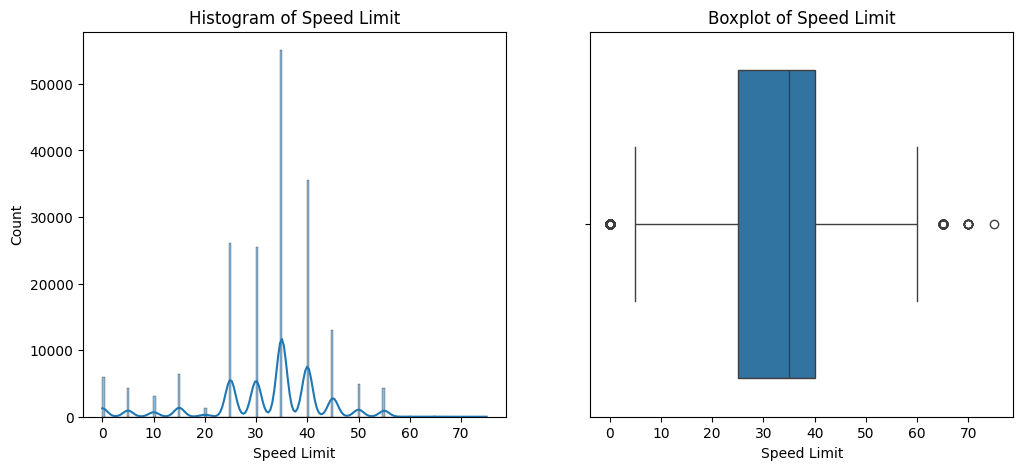

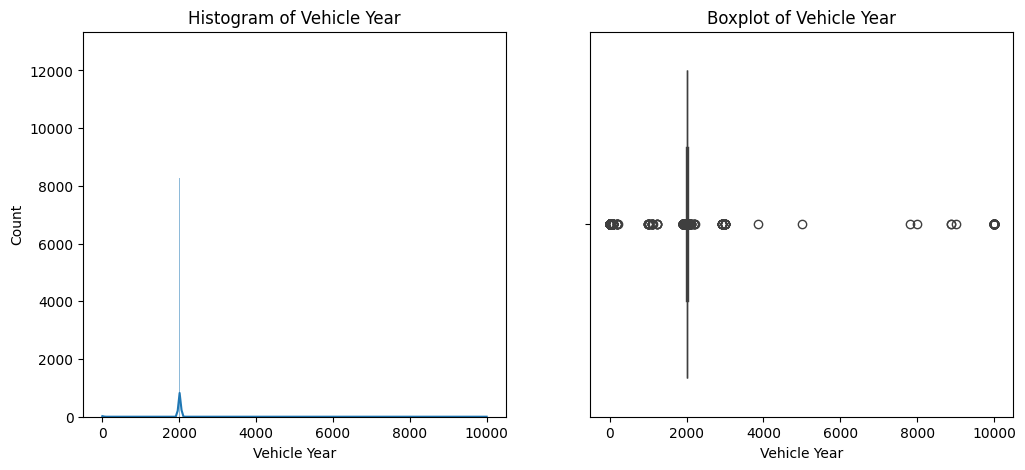

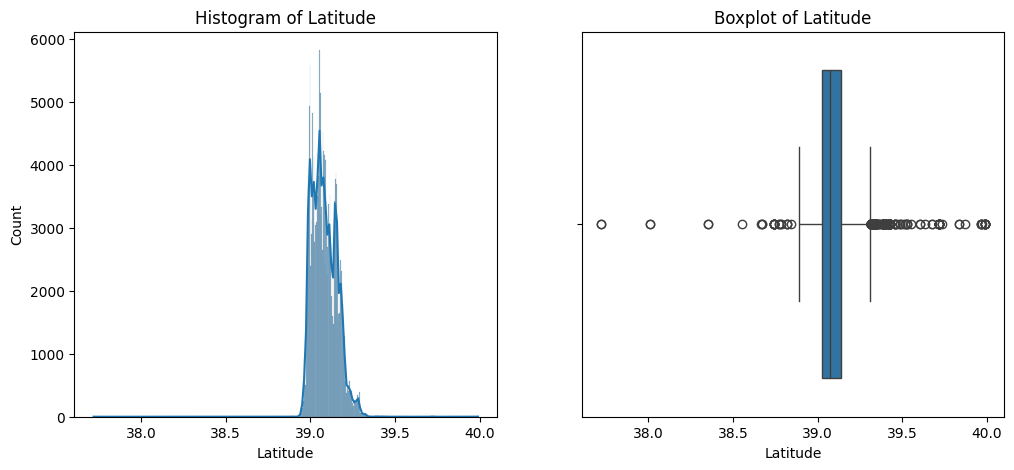

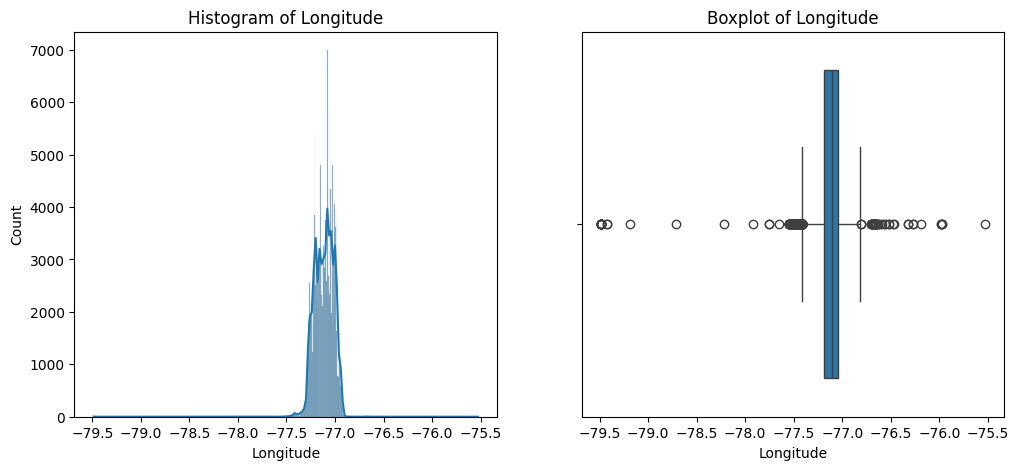

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

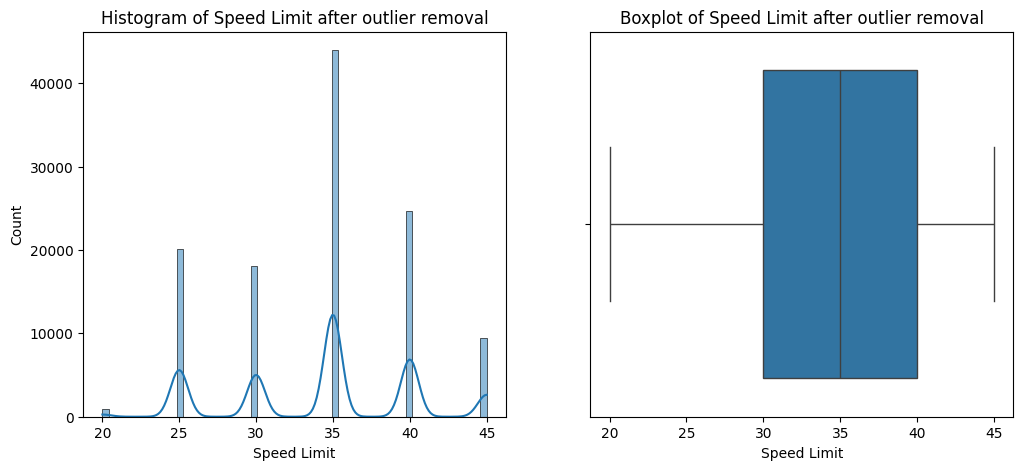

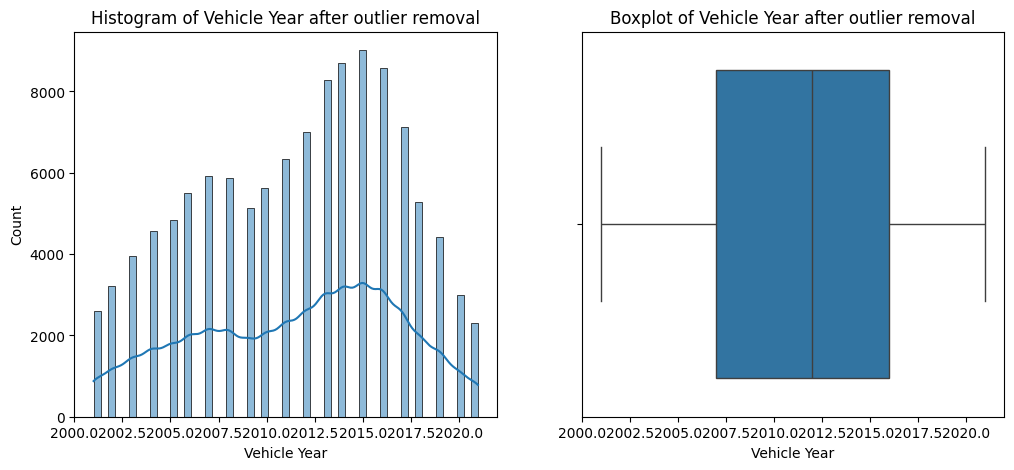

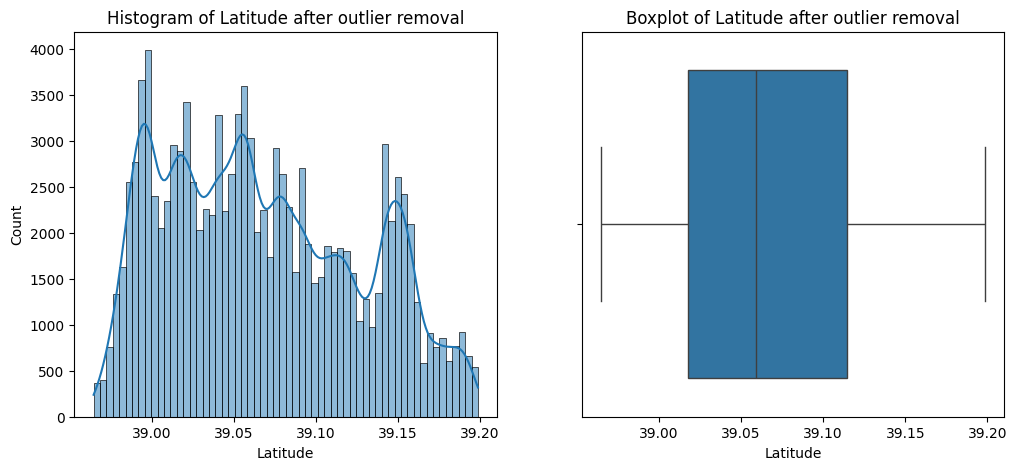

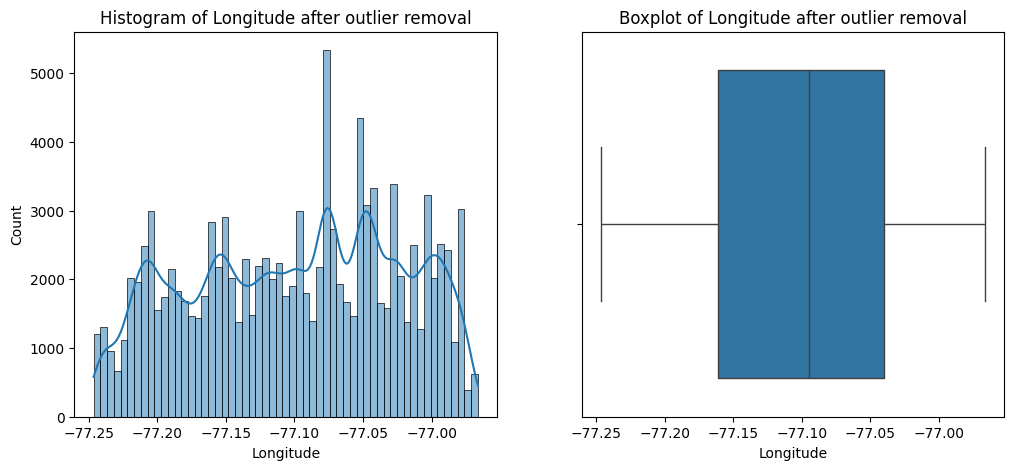

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - .5 * IQR
    upper_bound = Q3 + .5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Start with the original data
cleaned_data = data.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Visualize the cleaned data again to confirm outliers are removed
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

In [ ]:
cleaned_data.select_dtypes("number").skew()

,0
Speed Limit,-0.145858
Vehicle Year,-0.230406
Latitude,0.319152
Longitude,-0.137722
Target_encode,-0.013796


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data["Target_encode"]=label_encoder.fit_transform(cat["Driver At Fault"])
data["Target_encode"].unique()

array([0, 2, 1])

In [ ]:
data["Target_encode"]

NameError: name 'data' is not defined

In [ ]:
from  sklearn.preprocessing import StandardScaler

scaler = StandardScaler()